## Sequential Agent

In [191]:
from langgraph.graph import StateGraph
from typing import TypedDict, List

In [192]:
# Creating schema for the State of the Agent
class AgentState(TypedDict):
    name: str
    experience: float
    country: str
    organisation: List[str]

In [193]:
# Creating the First Node of Sequence
def first_job(state: AgentState) -> AgentState:
    """This function determines the completion of Dhanesh's First Job"""
    print(state)

    state["name"] = state.get("name")
    state["country"] = "India"


    if 0 < state.get("experience"):
        state["organisation"] = ["Tibco"]

    return state

In [194]:
# Creating the Second Node of Sequence
def change_country(state: AgentState) -> AgentState:
    """This function determines the completion of Dhanesh's Fourth Job (Third Job in Singapore)"""
    print(state)

    experience = state.get("experience")

    if 5 < experience:
        state["organisation"] = []
        state["organisation"].append("DBS Bank")
        state["country"] = "Singapore"
    if 6 < experience:
        state["organisation"].append("Equinix")
    if 8 < experience:
        state["organisation"].append("OCBC Bank")
    if 11 < experience:
        state["organisation"].append("Remote")

    return state

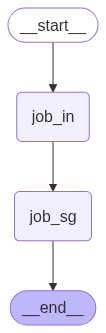

In [195]:
# Building the Graph Nodes & Edges
graph = StateGraph(AgentState)

graph.add_node("job_in", first_job)
graph.add_node("job_sg", change_country)

graph.set_entry_point("job_in")
graph.set_finish_point("job_sg")

graph.add_edge("job_in", "job_sg")
app = graph.compile()

app

In [196]:
result = app.invoke({"name": "Dhanesh", "experience": 11.1})

print(result)

{'name': 'Dhanesh', 'experience': 11.1}
{'name': 'Dhanesh', 'experience': 11.1, 'country': 'India', 'organisation': ['Tibco']}
{'name': 'Dhanesh', 'experience': 11.1, 'country': 'Singapore', 'organisation': ['DBS Bank', 'Equinix', 'OCBC Bank', 'Remote']}
